# TP2 - "Ausência Funcionários" Project 
___

## The Data

* ID - identificador único do funcionário;
* Reason for absence – número identificador associado à razão da ausência estruturadas pelo Código Internacional de Doenças (CID) – info. adicional disponível no fich. em anexo “Attribute Information.docx”;
* Month of absence – mês do caso de estudo;
* Day of the week – dia da semana do caso de estudo (segunda-feira (2), terça-feira (3), quarta-feira (4), quinta-feira (5), sexta-feira (6));
* Seasons – estação do ano do caso de estudo;
* Transportation expense – gastos financeiros associados ao transporte do funcionário;
* Distance from Residence to Work – distancia entre o local de trabalho e a residência do funcionário (quilómetros);
* Service time – tempo de serviço anual que o funcionário apresenta na empresa;
* Age – idade do funcionário;
* Work load Average/day – carga de trabalho médio que o funcionário apresenta por dia;
* Hit target – carga de trabalho percentual concluído pelo funcionário;
* Disciplinary failure – define se o funcionário já apresenta pelo menos uma falha disciplinar dentro da empresa (sim=1; não=0);
* Education – grau de escolaridade do funcionário (ensino médio (1), licenciatura (2), pósgraduação (3), mestrado e doutorado (4));
* Son – número de filhos que o funcionário apresenta;
* Pet – número de animais de estimação que o funcionário apresenta;
* Social drinker – define se o funcionário é bebedor social (sim=1; não=0);
* Social smoker – define se o funcionário é fumador (sim=1; não=0);
* Weight – peso do funcionário;
* Height – altura do funcionário;
* Body mass índex – índice de massa corporal do funcionário;
* Absent – apresenta se o funcionário irá ausentar ao trabalho (sim=1; não=0).

In [3]:
import pandas as pd
import numpy as np
## data_visualization_imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
## data_select_imports
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import ExtraTreesClassifier
## data_aug_imports    
from sklearn.utils import resample
## normalization
from sklearn import preprocessing
## model_imports    
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.calibration import calibration_curve

import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from imblearn.over_sampling import SMOTE

## constants
RANDOM_STATE = 1234

ModuleNotFoundError: No module named 'xgboost'

** Libraries configurations. **

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Get the Data

### Train Data

In [ ]:
train = pd.read_csv('train_data.csv', decimal=',')
train = train.drop(['ID'], axis=1)

**Check the head of the data**

In [217]:
train

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absent
0,26,7,3,1,289,2,1,0,0,2,0,1,2,1,0,1,1,1
1,0,7,3,1,118,0,3,2,0,2,1,1,1,1,0,0,2,0
2,23,7,4,1,179,3,3,1,0,2,0,1,0,1,0,0,2,1
3,7,7,5,1,279,0,2,2,0,2,0,1,2,1,1,0,0,1
4,23,7,5,1,289,2,1,0,0,2,0,1,2,1,0,1,1,1
5,23,7,6,1,179,3,3,1,0,2,0,1,0,1,0,0,2,1
6,22,7,6,1,361,3,0,0,0,2,0,1,1,1,0,4,1,1
7,23,7,6,1,260,2,1,1,0,2,0,1,4,1,0,0,0,1
8,19,7,2,1,155,0,2,0,0,2,0,1,2,1,0,0,1,1
9,22,7,2,1,235,0,2,1,0,2,0,3,1,0,0,1,1,1


** Check the info() and describe() methods on the data.**

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
ID                                 500 non-null int64
Reason for absence                 500 non-null int64
Month of absence                   500 non-null int64
Day of the week                    500 non-null int64
Seasons                            500 non-null int64
Transportation expense             500 non-null int64
Distance from Residence to Work    500 non-null int64
Service time                       500 non-null int64
Age                                500 non-null int64
Work load Average/day              500 non-null object
Hit target                         500 non-null int64
Disciplinary failure               500 non-null int64
Education                          500 non-null int64
Son                                500 non-null int64
Social drinker                     500 non-null int64
Social smoker                      500 non-null int64
Pet                           

In [100]:
train.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,19.288000,6.614000,3.88000,2.450000,223.640000,29.978000,12.650000,36.660000,276.792768,94.168000,0.064000,1.204000,1.086000,0.620000,0.076000,0.628000,79.698000,172.098000,26.870000,0.790000
std,8.543245,3.343555,1.43587,1.165425,67.323155,15.068498,4.036345,6.137731,43.422723,3.912338,0.244998,0.561261,1.178721,0.485873,0.265264,1.071406,12.605101,6.234913,4.151092,0.407716
min,0.000000,1.000000,2.00000,1.000000,118.000000,5.000000,3.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.750000,3.00000,1.000000,179.000000,16.000000,10.000000,33.000000,244.387000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,1.000000
50%,23.000000,7.000000,4.00000,2.000000,225.000000,26.000000,13.000000,37.000000,265.017000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,1.000000
75%,26.000000,9.000000,5.00000,4.000000,260.000000,50.000000,16.000000,40.000000,306.345000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,1.000000
max,28.000000,12.000000,6.00000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,3.000000,4.000000,1.000000,1.000000,5.000000,108.000000,196.000000,38.000000,1.000000


### Test Data

In [ ]:
test_features = pd.read_csv('test_data.csv')
test_labels = pd.read_csv('sample_submission.csv')

** Join dataframes as one **

In [ ]:
test = pd.merge(test_features, test_labels, on='ID')
test = test.drop(['ID'], axis=1)
test['Work load Average/day '] = test['Work load Average/day '] / 1000
test.head(100)

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 21 columns):
ID                                 240 non-null int64
Reason for absence                 240 non-null int64
Month of absence                   240 non-null int64
Day of the week                    240 non-null int64
Seasons                            240 non-null int64
Transportation expense             240 non-null int64
Distance from Residence to Work    240 non-null int64
Service time                       240 non-null int64
Age                                240 non-null int64
Work load Average/day              240 non-null float64
Hit target                         240 non-null int64
Disciplinary failure               240 non-null int64
Education                          240 non-null int64
Son                                240 non-null int64
Social drinker                     240 non-null int64
Social smoker                      240 non-null int64
Pet                          

In [101]:
test.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,19.066667,5.720833,3.987500,2.741667,216.516667,28.908333,12.354167,36.012500,260.443292,95.462500,0.033333,1.475000,0.879167,0.458333,0.066667,0.991667,77.654167,172.150000,26.275000,0.816667
std,8.215439,3.553710,1.391791,0.963743,66.052532,14.345991,5.037473,7.130864,24.472999,3.327119,0.179881,0.833026,0.895119,0.499302,0.249965,1.699106,13.365524,5.608049,4.535241,0.387748
min,0.000000,0.000000,2.000000,1.000000,118.000000,10.000000,1.000000,28.000000,222.196000,87.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,30.000000,237.656000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.750000,24.000000,1.000000
50%,23.000000,5.000000,4.000000,3.000000,225.000000,26.000000,12.000000,37.000000,264.249000,96.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,75.000000,171.000000,25.000000,1.000000
75%,27.000000,10.000000,5.000000,4.000000,235.000000,48.000000,17.000000,40.000000,275.089000,99.000000,0.000000,2.000000,2.000000,1.000000,0.000000,2.000000,89.000000,172.000000,31.000000,1.000000
max,28.000000,12.000000,6.000000,4.000000,378.000000,52.000000,29.000000,58.000000,313.532000,99.000000,1.000000,4.000000,3.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,1.000000


### Prepare data for Model (run once, using all the techniques applied)

In [16]:
## remove outliers and perform binning
#data_eng_outliers()
#data_eng_train_bin()
#data_eng_test_bin()
## feature removal
#data_select()
## create data aumented train and test
#data_aug_upsample()
#data_aug_downsample()
#data_aug_downsample_upsample()
#data_aug_upsample_upsample()
## create subsets
#model_subsets()

UnboundLocalError: local variable 'train' referenced before assignment

In [ ]:
# Capping the outlier rows with Percentiles
upper_lim = train['Service time'].quantile(.95)
train.loc[(train['Service time'] > upper_lim), 'Service time'] = upper_lim

# Capping the outlier rows with Percentiles
lower_lim = train['Hit target'].quantile(.04)
train.loc[(train['Hit target'] < lower_lim), 'Hit target'] = lower_lim

In [ ]:
train['Transportation expense'] = pd.qcut(train['Transportation expense'], q = 4, labels = False)
# 1 - jovem adulto; 2 - adulto; 3 - pré-sénior
train['Age'] = pd.qcut(train['Age'], q = 3, labels = False)
train['Distance from Residence to Work'] = pd.qcut(train['Distance from Residence to Work'], q = 4, labels = False)
train['Service time'] = pd.qcut(train['Service time'], q = 4, labels = False)
# 1 - trabalhar pouco; 2 - satisfaz; 3 - trabalha muito; 4 - é o sérgio e o vitor
train['Work load Average/day '] = pd.qcut(train['Work load Average/day '], q = 4, labels = False)
train['Hit target'] = pd.qcut(train['Hit target'], q = 3, labels = False)
# 1 - magro; 2 - normal; 3 - gordo
train['Body mass index'] = pd.qcut(train['Body mass index'], q = 3, labels = False)

In [ ]:
# MODULAR O TESTE
test['Transportation expense'] = pd.qcut(test['Transportation expense'], q = 4, labels = False)
# 1 - jovem adulto; 2 - adulto; 3 - pré-sénior
test['Age'] = pd.qcut(test['Age'], q = 3, labels = False)
test['Distance from Residence to Work'] = pd.qcut(test['Distance from Residence to Work'], q = 4, labels = False)
test['Service time'] = pd.qcut(test['Service time'], q = 4, labels = False)
# 1 - trabalhar pouco; 2 - satisfaz; 3 - trabalha muito; 4 - é o sérgio e o vitor
test['Work load Average/day '] = pd.qcut(test['Work load Average/day '], q = 4, labels = False)
test['Hit target'] = pd.qcut(test['Hit target'], q = 3, labels = False)
# 1 - magro; 2 - normal; 3 - gordo
test['Body mass index'] = pd.qcut(test['Body mass index'], q = 3, labels = False)

In [ ]:
train = train.drop(['Height', 'Weight', 'Social drinker', 'Social smoker', 'Education', 'Pet', 'Transportation expense', 'Distance from Residence to Work'], axis=1)
test = test.drop(['Height', 'Weight', 'Social drinker', 'Social smoker', 'Education', 'Pet', 'Transportation expense', 'Distance from Residence to Work'], axis=1)
## more profound drop (model still overfitted a lot)
train = train.drop(['Service time', 'Age', 'Son', 'Body mass index'], axis=1)
test = test.drop(['Service time', 'Age', 'Son', 'Body mass index'], axis=1)

One Hot Encoding on 

In [ ]:
# columns to one hot
cat_columns = ['Reason for absence', 'Month of absence', 'Seasons', 'Day of the week']
# process one hot
df_processed = pd.get_dummies(train, prefix_sep="__", columns=cat_columns)
# save the dummies shown on train to match with later test dummies
cat_dummies = [col for col in df_processed 
               if "__" in col 
               and col.split("__")[0] in cat_columns]
# save to later enforce the same order of columns
processed_columns = list(df_processed.columns[:])
# process the test (unseen data)
df_test_processed = pd.get_dummies(test, prefix_sep="__", columns=cat_columns)
# Remove additional columns (that didnt appear on train, so we cant use on test)
for col in df_test_processed.columns:
    if ("__" in col) and (col.split("__")[0] in cat_columns) and col not in cat_dummies:
        print("Removing additional feature {}".format(col))
        df_test_processed.drop(col, axis=1, inplace=True)
# Add the columns seen on train but not shown on test (with value 0 ofc)
for col in cat_dummies:
    if col not in df_test_processed.columns:
        print("Adding missing feature {}".format(col))
        df_test_processed[col] = 0
# Make the order right for the model
df_test_processed = df_test_processed[processed_columns]

## Set values back
train = df_processed
test = df_test_processed

Subsets

In [80]:
train_absent0_minority = train[train['Absent'] == 0]
train_absent1_majority = train[train['Absent'] == 1]

samplesToHave = train_absent1_majority['Absent'].count()
print(samplesToHave)
train_absent0_upsampled = resample(train_absent0_minority, replace = True, n_samples = samplesToHave, random_state = RANDOM_STATE)
train_upsampled = pd.concat([train_absent1_majority, train_absent0_upsampled])
train_upsampled['Absent'].value_counts()

395


1    395
0    395
Name: Absent, dtype: int64

In [81]:
# upsamble first (double the original number)
train_absent0_minority = train[train['Absent'] == 0]
train_absent1_majority = train[train['Absent'] == 1]

samplesToHave = train_absent0_minority['Absent'].count()
print(samplesToHave)
train_absent1_downsampled = resample(train_absent1_majority, replace = False, n_samples = samplesToHave, random_state = RANDOM_STATE)
train_downsampled = pd.concat([train_absent0_minority, train_absent1_downsampled])
train_downsampled['Absent'].value_counts()

105


1    105
0    105
Name: Absent, dtype: int64

In [82]:
# upsamble first (double the original number)
train_absent0_minority = train[train['Absent'] == 0]
train_absent1_majority = train[train['Absent'] == 1]

samplesToHave = train_absent0_minority['Absent'].count() * 2
print(samplesToHave)
train_absent0_upsampled = resample(train_absent0_minority, replace = True, n_samples = samplesToHave, random_state = RANDOM_STATE)
train_upsampled = pd.concat([train_absent1_majority, train_absent0_upsampled])
print(train_upsampled['Absent'].value_counts())

train_absent0_minority = train_upsampled[train_upsampled['Absent'] == 0]
train_absent1_majority = train_upsampled[train_upsampled['Absent'] == 1]

samplesToHave = train_absent0_minority['Absent'].count()
print(samplesToHave)
train_absent1_downsampled = resample(train_absent1_majority, replace = False, n_samples = samplesToHave, random_state = RANDOM_STATE)
train_upsampled_downsampled = pd.concat([train_absent0_minority, train_absent1_downsampled])
print(train_upsampled_downsampled['Absent'].value_counts())

210
1    395
0    210
Name: Absent, dtype: int64
210
1    210
0    210
Name: Absent, dtype: int64


In [83]:
train_absent0_minority = train[train['Absent'] == 0]
train_absent1_majority = train[train['Absent'] == 1]
multiple = 1.3

# upsamble minority
samplesToHave = int(train_absent0_minority['Absent'].count() * multiple)
print("Minority samples: ", samplesToHave)
train_absent0_upsampled = resample(train_absent0_minority, replace = True, n_samples = samplesToHave, random_state = RANDOM_STATE)
# upsamble majority
samplesToHave = int(train_absent1_majority['Absent'].count() * multiple)
print("Majority samples: ", samplesToHave)
train_absent1_upsampled = resample(train_absent1_majority, replace = True, n_samples = samplesToHave, random_state = RANDOM_STATE)

train_upsampled_upsampled = pd.concat([train_absent1_upsampled, train_absent0_upsampled])
train_upsampled_upsampled['Absent'].value_counts()

Minority samples:  136
Majority samples:  513


1    513
0    136
Name: Absent, dtype: int64

In [84]:
xTrain = train.drop(['Absent'], axis=1)
yTrain = train['Absent']

xTest = test.drop(['Absent'], axis=1)
yTest = test['Absent']

xTrain_upsampled = train_upsampled.drop(['Absent'], axis=1)
yTrain_upsampled = train_upsampled['Absent']

xTrain_downsampled = train_downsampled.drop(['Absent'], axis=1)
yTrain_downsampled = train_downsampled['Absent']

xTrain_upsampled_downsampled = train_upsampled_downsampled.drop(['Absent'], axis=1)
yTrain_upsampled_downsampled = train_upsampled_downsampled['Absent']

xTrain_upsampled_upsampled = train_upsampled_upsampled.drop(['Absent'], axis=1)
yTrain_upsampled_upsampled = train_upsampled_upsampled['Absent']

sm = SMOTE(random_state=RANDOM_STATE, sampling_strategy = 1.0)
xTrain_smote, yTrain_smote = sm.fit_sample(xTrain, yTrain)

In [16]:
xTrain.head(2)

,Work load Average/day,Hit target,Disciplinary failure,Reason for absence__0,Reason for absence__1,Reason for absence__3,Reason for absence__4,Reason for absence__5,Reason for absence__6,Reason for absence__7,Reason for absence__8,Reason for absence__9,Reason for absence__10,Reason for absence__11,Reason for absence__12,Reason for absence__13,Reason for absence__14,Reason for absence__15,Reason for absence__17,Reason for absence__18,Reason for absence__19,Reason for absence__21,Reason for absence__22,Reason for absence__23,Reason for absence__24,Reason for absence__25,Reason for absence__26,Reason for absence__27,Reason for absence__28,Month of absence__1,Month of absence__2,Month of absence__3,Month of absence__4,Month of absence__5,Month of absence__6,Month of absence__7,Month of absence__8,Month of absence__9,Month of absence__10,Month of absence__11,Month of absence__12,Seasons__1,Seasons__2,Seasons__3,Seasons__4,Day of the week__2,Day of the week__3,Day of the week__4,Day of the week__5,Day of the week__6
0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


## Data Visualization

* Com todos os dados

In [8]:
reason_count = train_upsampled_downsampled['Reason for absence'].value_counts()
sns.set(style="darkgrid")
sns.barplot(reason_count.index, reason_count.values, alpha=0.9)
plt.title('Frequency Distribution of Reasons')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Reason', fontsize=12)
plt.show()

NameError: name 'train_upsampled_downsampled' is not defined

In [164]:
reason_count = train_upsampled_downsampled[train_upsampled_downsampled['Absent'] == 1]

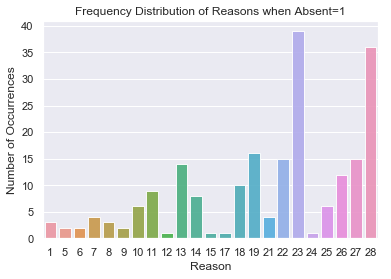

In [166]:
reason_count = train_upsampled_downsampled[train_upsampled_downsampled['Absent'] == 1]['Reason for absence'].value_counts()
sns.set(style="darkgrid")
sns.barplot(reason_count.index, reason_count.values, alpha=0.9)
plt.title('Frequency Distribution of Reasons when Absent=1')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Reason', fontsize=12)
plt.show()

* Todos os motivos vs absent

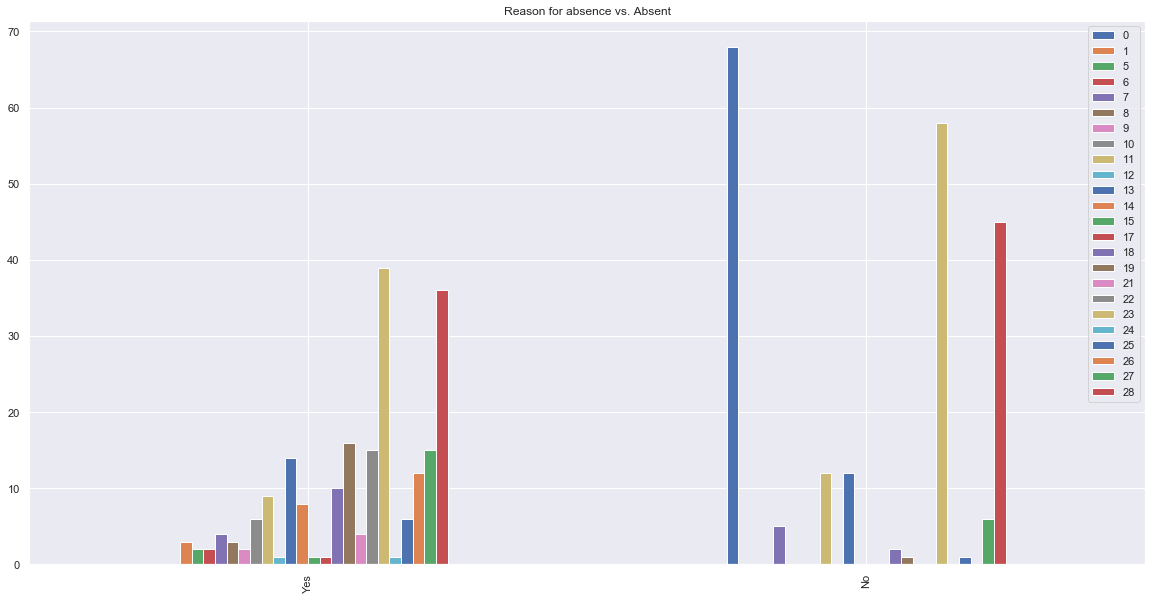

In [177]:
reason_count_1 = train_upsampled_downsampled[train_upsampled_downsampled['Absent'] == 1]['Reason for absence'].value_counts()
reason_count_0 = train_upsampled_downsampled[train_upsampled_downsampled['Absent'] == 0]['Reason for absence'].value_counts()
df = pd.DataFrame([reason_count_1, reason_count_0])
df.index = ['Yes', 'No']
df.plot(kind='bar', title = "Reason for absence vs. Absent", figsize=(20,10))

* Motivos particulares em análise-

In [ ]:
reason_count_1 = train_upsampled_downsampled[train_upsampled_downsampled['Absent'] == 1 &
                                            train_upsampled_downsampled['Reason for absence'] == 1]['Reason for absence'].value_counts()
reason_count_0 = train_upsampled_downsampled[train_upsampled_downsampled['Absent'] == 0]['Reason for absence'].value_counts()
df = pd.DataFrame([reason_count_1, reason_count_0])
df.index = ['Yes', 'No']
df.plot(kind='bar', stacked=True)

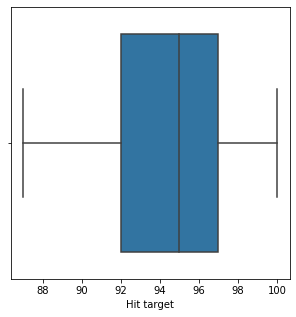

In [170]:
# Distribuição do tempo de serviço
sns.boxplot(x=train['Hit target'])
plt.rcParams['figure.figsize']=(5,5)

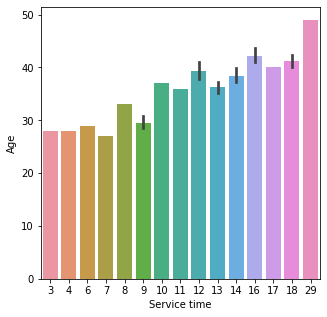

In [96]:
# Tempo de serviço vs. Idade
sns.barplot(x='Service time', y='Age', data=train)

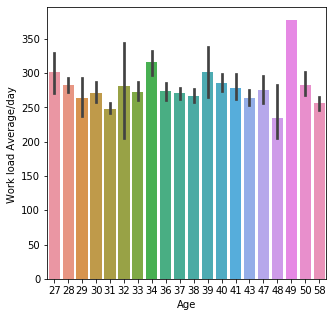

In [97]:
# Workload/Avg vs. Idade
sns.barplot(x='Age', y='Work load Average/day ', data=train)

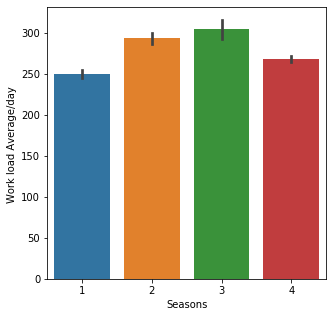

In [98]:
# Wokrload/Avg vs. Seasons
sns.barplot(x='Seasons', y='Work load Average/day ', data=train)

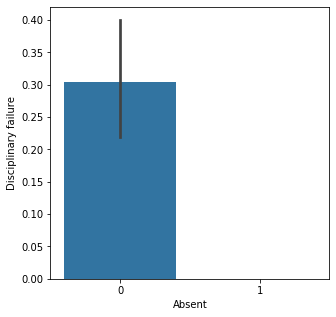

In [99]:
# Falha disciplinar vs. Absent
sns.barplot(x='Absent', y='Disciplinary failure', data=train)

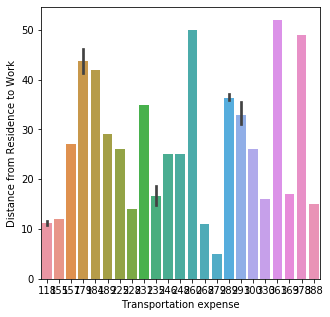

In [174]:
# Transportation expense vs. Absent
sns.barplot(x='Transportation expense', y='Distance from Residence to Work', data=train)

### Feature Correlation

* ORIGINAL

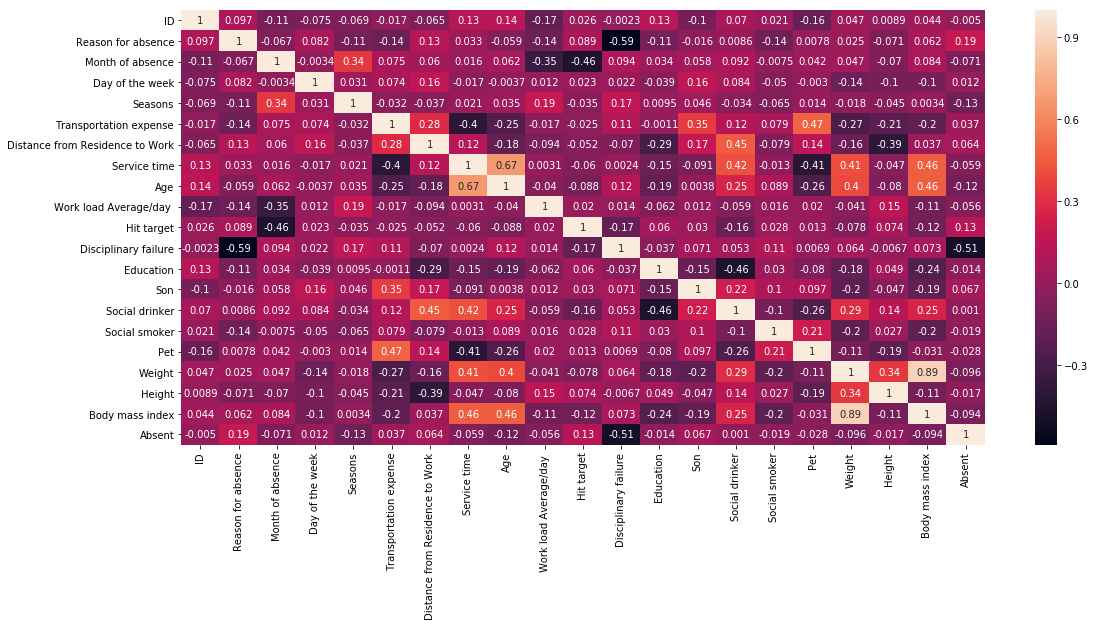

In [154]:
plt.figure(figsize=(18, 8))
sns.heatmap(train.corr(), annot = True)

* OVERSAMPLED

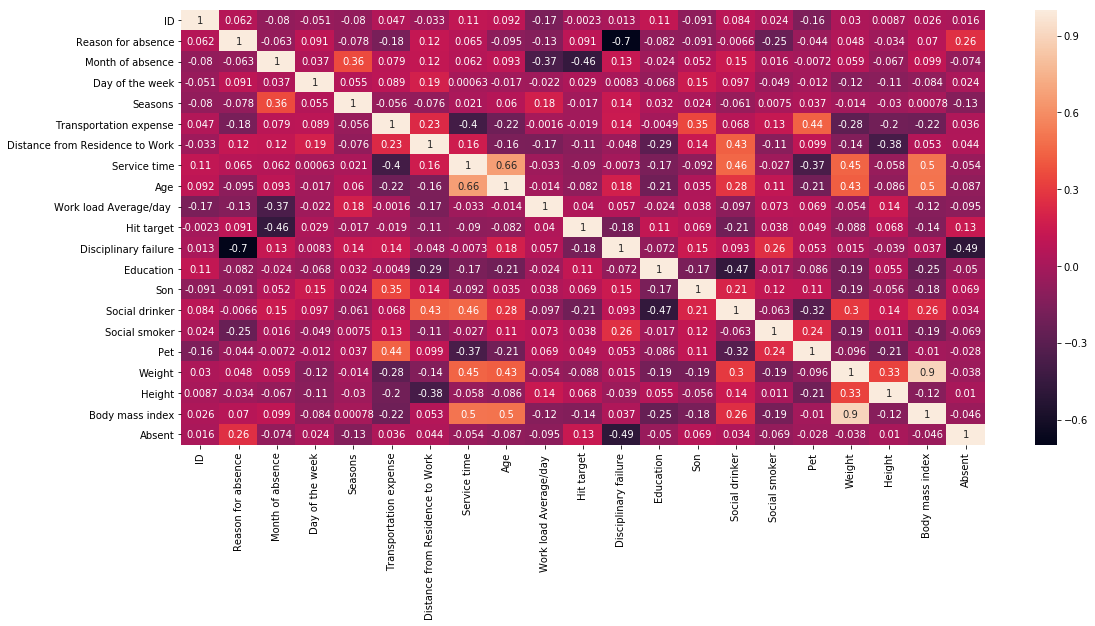

In [157]:
plt.figure(figsize=(18, 8))
sns.heatmap(train_upsampled.corr(), annot = True)

* UNDERSAMPLED & OVERSAMPLED

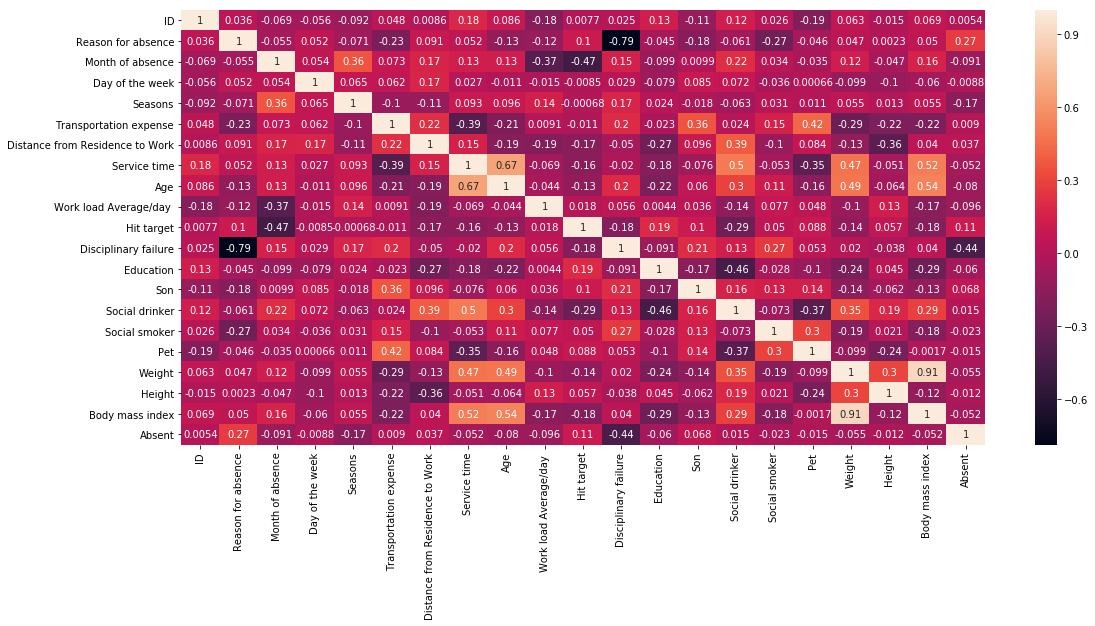

In [156]:
plt.figure(figsize=(18, 8))
sns.heatmap(train_upsampled_downsampled.corr(), annot = True)

** Despesa de transporte, Educação, Bebedor Social, Fumador Social, Animais, Altura são de menor importância **

* Mês está na média. Média é 5,7, o mês de Junho é 6.
* Dia da semana está na média expectável, quarta-feira (3.98).
* A média aponta para fim de inverno / inicio de primavera: 2,74. (2 - inverno, 3 - primavera, 1 - verao, 4 - outono)
* Despesas de transporte, Distância ao trabalho, Tempo de serviço, Idade, Work load Average/day, Hit Target são bem distribuídos
* Falha disciplinar pode ser interessante, uma vez que a maioria não as comete.
* Na Educação, a média a 1,47 indica presença de muitas pessoas com ensino médio e licenciatura. Há alguns com escolaridade mais alta, podem merecer atenção.
* Número de filhos encontra-se equilibrado.
* Bebedor social, está na média com 0,45.
* Fumador social, com a média muito baixa. Fumar pode ser um bom indicativo de falha por doença.
* Em animais, a média é um animal mas há uma casos com imensos animais. Pode valer a pena agrupar estes casos.
* Peso com boa distribuição.
* Altura com distribuição muito concentrada nos meios 50%, ter atenção ao caso.
* IMC tem uma distribuição estranha nos 25% aos 50% e aos 75%.
* Absent apresenta um desbalanceamento grande. 81% são ausências.

## Data Augmentation

#### Undersampling / Oversampling

*** Upsample Absent = 0 to match the number of Absent = 1 ***

In [7]:
def data_aug_upsample():
    train_absent0_minority = train[train['Absent'] == 0]
    train_absent1_majority = train[train['Absent'] == 1]

    samplesToHave = train_absent1_majority['Absent'].count()
    print(samplesToHave)
    train_absent0_upsampled = resample(train_absent0_minority, replace = True, n_samples = samplesToHave, random_state = RANDOM_STATE)
    train_upsampled = pd.concat([train_absent1_majority, train_absent0_upsampled])
    train_upsampled['Absent'].value_counts()

*** Downsample Absent = 1 to match the number of Absent = 0 ***

In [8]:
def data_aug_downsample():
    # upsamble first (double the original number)
    train_absent0_minority = train[train['Absent'] == 0]
    train_absent1_majority = train[train['Absent'] == 1]

    samplesToHave = train_absent0_minority['Absent'].count()
    print(samplesToHave)
    train_absent1_downsampled = resample(train_absent1_majority, replace = False, n_samples = samplesToHave, random_state = RANDOM_STATE)
    train_downsampled = pd.concat([train_absent0_minority, train_absent1_downsampled])
    train_downsampled['Absent'].value_counts()

*** Downsample Absent = 1 , Upsample Absent = 0 ***

In [9]:
def data_aug_downsample_upsample():
    # upsamble first (double the original number)
    train_absent0_minority = train[train['Absent'] == 0]
    train_absent1_majority = train[train['Absent'] == 1]

    samplesToHave = train_absent0_minority['Absent'].count() * 2
    print(samplesToHave)
    train_absent0_upsampled = resample(train_absent0_minority, replace = True, n_samples = samplesToHave, random_state = RANDOM_STATE)
    train_upsampled = pd.concat([train_absent1_majority, train_absent0_upsampled])
    print(train_upsampled['Absent'].value_counts())

    train_absent0_minority = train_upsampled[train_upsampled['Absent'] == 0]
    train_absent1_majority = train_upsampled[train_upsampled['Absent'] == 1]

    samplesToHave = train_absent0_minority['Absent'].count()
    print(samplesToHave)
    train_absent1_downsampled = resample(train_absent1_majority, replace = False, n_samples = samplesToHave, random_state = RANDOM_STATE)
    train_upsampled_downsampled = pd.concat([train_absent0_minority, train_absent1_downsampled])
    print(train_upsampled_downsampled['Absent'].value_counts())

*** Upsamble Absent = 1 , Upsample Absent = 0 ***

In [10]:
def data_aug_upsample_upsample():
    train_absent0_minority = train[train['Absent'] == 0]
    train_absent1_majority = train[train['Absent'] == 1]
    multiple = 1.3

    # upsamble minority
    samplesToHave = int(train_absent0_minority['Absent'].count() * multiple)
    print("Minority samples: ", samplesToHave)
    train_absent0_upsampled = resample(train_absent0_minority, replace = True, n_samples = samplesToHave, random_state = RANDOM_STATE)
    # upsamble majority
    samplesToHave = int(train_absent1_majority['Absent'].count() * multiple)
    print("Minority samples: ", samplesToHave)
    train_absent1_upsampled = resample(train_absent1_majority, replace = True, n_samples = samplesToHave, random_state = RANDOM_STATE)

    train_upsampled_upsampled = pd.concat([train_absent1_upsampled, train_absent0_upsampled])
    train_upsampled_upsampled['Absent'].value_counts()

## Feature Engineering

In [213]:
train.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,19.288000,6.614000,3.88000,2.450000,223.640000,1.366000,1.336000,0.936000,1.414000,0.902000,0.064000,1.204000,1.086000,0.620000,0.076000,0.628000,79.698000,172.098000,0.918000,0.790000
std,8.543245,3.343555,1.43587,1.165425,67.323155,1.059381,1.126784,0.798235,1.119424,0.835339,0.244998,0.561261,1.178721,0.485873,0.265264,1.071406,12.605101,6.234913,0.790269,0.407716
min,0.000000,1.000000,2.00000,1.000000,118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,0.000000,0.000000
25%,13.000000,3.750000,3.00000,1.000000,179.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,0.000000,1.000000
50%,23.000000,7.000000,4.00000,2.000000,225.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,1.000000,1.000000
75%,26.000000,9.000000,5.00000,4.000000,260.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,2.000000,1.000000
max,28.000000,12.000000,6.00000,4.000000,388.000000,3.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,4.000000,1.000000,1.000000,5.000000,108.000000,196.000000,2.000000,1.000000


#### Handling Outliers

##### Clean outliers code (run once)

In [11]:
def data_eng_outliers():
    # Capping the outlier rows with Percentiles
    upper_lim = train['Service time'].quantile(.95)
    train.loc[(train['Service time'] > upper_lim), 'Service time'] = upper_lim

    # Capping the outlier rows with Percentiles
    lower_lim = train['Hit target'].quantile(.04)
    train.loc[(train['Hit target'] < lower_lim), 'Hit target'] = lower_lim

#### Binning

* Transportation expense, Distance from Residence to Work, Service time, Age, Work load Average/day, Hit target, Body mass index

(array([ 29.,   0.,  14.,   2., 104.,  48.,  98.,  62.,  31., 112.]),
 array([ 3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. , 16.5, 18. ]),
 <a list of 10 Patch objects>)

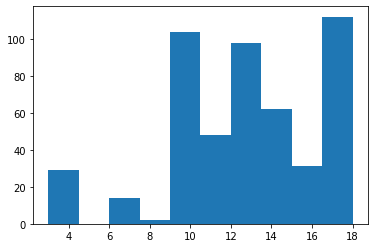

In [188]:
plt.hist(train['Service time'])

In [12]:
def data_eng_train_bin():
    train['Transportation expense'] = pd.qcut(train['Transportation expense'], q = 4, labels = False)

    # 1 - jovem adulto; 2 - adulto; 3 - pré-sénior
    train['Age'] = pd.qcut(train['Age'], q = 3, labels = False)

    train['Distance from Residence to Work'] = pd.qcut(train['Distance from Residence to Work'], q = 4, labels = False)

    train['Service time'] = pd.qcut(train['Service time'], q = 4, labels = False)

    # 1 - trabalhar pouco; 2 - satisfaz; 3 - trabalha muito; 4 - é o sérgio e o vitor
    train['Work load Average/day '] = pd.qcut(train['Work load Average/day '], q = 4, labels = False)

    train['Hit target'] = pd.qcut(train['Hit target'], q = 3, labels = False)

    # 1 - magro; 2 - normal; 3 - gordo
    train['Body mass index'] = pd.qcut(train['Body mass index'], q = 3, labels = False)

In [13]:
def data_eng_test_bin():
    # MODULAR O TESTE
    test['Transportation expense'] = pd.qcut(test['Transportation expense'], q = 4, labels = False)

    # 1 - jovem adulto; 2 - adulto; 3 - pré-sénior
    test['Age'] = pd.qcut(test['Age'], q = 3, labels = False)

    test['Distance from Residence to Work'] = pd.qcut(test['Distance from Residence to Work'], q = 4, labels = False)

    test['Service time'] = pd.qcut(test['Service time'], q = 4, labels = False)

    # 1 - trabalhar pouco; 2 - satisfaz; 3 - trabalha muito; 4 - é o sérgio e o vitor
    test['Work load Average/day '] = pd.qcut(test['Work load Average/day '], q = 4, labels = False)

    test['Hit target'] = pd.qcut(test['Hit target'], q = 3, labels = False)

    # 1 - magro; 2 - normal; 3 - gordo
    test['Body mass index'] = pd.qcut(test['Body mass index'], q = 3, labels = False)

#### One Hot Encoding

In [57]:
def data_one_hot():
    trainCopy = train
    testCopy = test
    # columns to one hot
    cat_columns = ['Reason for absence', 'Month of absence', 'Seasons', 'Day of the week']
    # process one hot
    df_processed = pd.get_dummies(trainCopy, prefix_sep="__", columns=cat_columns)
    # save the dummies shown on train to match with later test dummies
    cat_dummies = [col for col in df_processed 
                   if "__" in col 
                   and col.split("__")[0] in cat_columns]
    # save to later enforce the same order of columns
    processed_columns = list(df_processed.columns[:])
    # process the test (unseen data)
    df_test_processed = pd.get_dummies(testCopy, prefix_sep="__", columns=cat_columns)
    # Remove additional columns (that didnt appear on train, so we cant use on test)
    for col in df_test_processed.columns:
        if ("__" in col) and (col.split("__")[0] in cat_columns) and col not in cat_dummies:
            print("Removing additional feature {}".format(col))
            df_test_processed.drop(col, axis=1, inplace=True)
    # Add the columns seen on train but not shown on test (with value 0 ofc)
    for col in cat_dummies:
        if col not in df_test_processed.columns:
            print("Adding missing feature {}".format(col))
            df_test_processed[col] = 0
    # Make the order right for the model
    df_test_processed = df_test_processed[processed_columns]

    ## Set values back
    train = df_processed
    test = df_test_processed

In [55]:
df_processed.head(2)

,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Body mass index,Reason for absence__0,Reason for absence__1,Reason for absence__3,Reason for absence__4,Reason for absence__5,Reason for absence__6,Reason for absence__7,Reason for absence__8,Reason for absence__9,Reason for absence__10,Reason for absence__11,Reason for absence__12,Reason for absence__13,Reason for absence__14,Reason for absence__15,Reason for absence__17,Reason for absence__18,Reason for absence__19,Reason for absence__21,Reason for absence__22,Reason for absence__23,Reason for absence__24,Reason for absence__25,Reason for absence__26,Reason for absence__27,Reason for absence__28,Month of absence__1,Month of absence__2,Month of absence__3,Month of absence__4,Month of absence__5,Month of absence__6,Month of absence__7,Month of absence__8,Month of absence__9,Month of absence__10,Month of absence__11,Month of absence__12,Seasons__1,Seasons__2,Seasons__3,Seasons__4
0,1,0,0,2,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,3,2,0,2,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [56]:
df_test_processed.head(2)

,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Body mass index,Reason for absence__0,Reason for absence__1,Reason for absence__3,Reason for absence__4,Reason for absence__5,Reason for absence__6,Reason for absence__7,Reason for absence__8,Reason for absence__9,Reason for absence__10,Reason for absence__11,Reason for absence__12,Reason for absence__13,Reason for absence__14,Reason for absence__15,Reason for absence__17,Reason for absence__18,Reason for absence__19,Reason for absence__21,Reason for absence__22,Reason for absence__23,Reason for absence__24,Reason for absence__25,Reason for absence__26,Reason for absence__27,Reason for absence__28,Month of absence__1,Month of absence__2,Month of absence__3,Month of absence__4,Month of absence__5,Month of absence__6,Month of absence__7,Month of absence__8,Month of absence__9,Month of absence__10,Month of absence__11,Month of absence__12,Seasons__1,Seasons__2,Seasons__3,Seasons__4
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,2,2,1,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


## Feature Selection

The most important are: Reason, Month, Seasons, Service Time, Age, Work load, Hit Target, Disciplinary, Son, Body Mass

In [14]:
def data_select():
    train = train.drop(['Height', 'Weight', 'Social drinker', 'Social smoker', 'Education', 'Pet', 'Transportation expense', 'Distance from Residence to Work'], axis=1)
    test = test.drop(['Height', 'Weight', 'Social drinker', 'Social smoker', 'Education', 'Pet', 'Transportation expense', 'Distance from Residence to Work'], axis=1)
    ## more profound drop
    train = train.drop(['Service time', 'Age', 'Son', 'Body mass index'], axis=1)
    test = test.drop(['Service time', 'Age', 'Son', 'Body mass index'], axis=1)

In [1]:
train

NameError: name 'train' is not defined

                              Specs       Score
10             Disciplinary failure  120.380952
0                Reason for absence   66.522847
5   Distance from Residence to Work   15.242923
4            Transportation expense   13.541172
8            Work load Average/day    10.753158
16                           Weight    9.206821
7                               Age    6.885385
3                           Seasons    4.960266
1                  Month of absence    4.292794
12                              Son    2.852468
18                  Body mass index    2.846345
6                      Service time    2.264865
9                        Hit target    1.322542
15                              Pet    0.704968
14                    Social smoker    0.165033
2                   Day of the week    0.035918
17                           Height    0.033016
[0.19517684 0.08201763 0.11448081 0.04766606 0.01975942 0.01654541
 0.02345413 0.02504589 0.0911071  0.08628825 0.18579452 0.00826167
 0

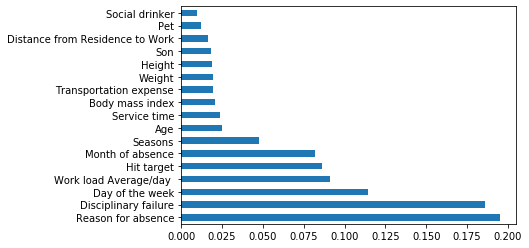

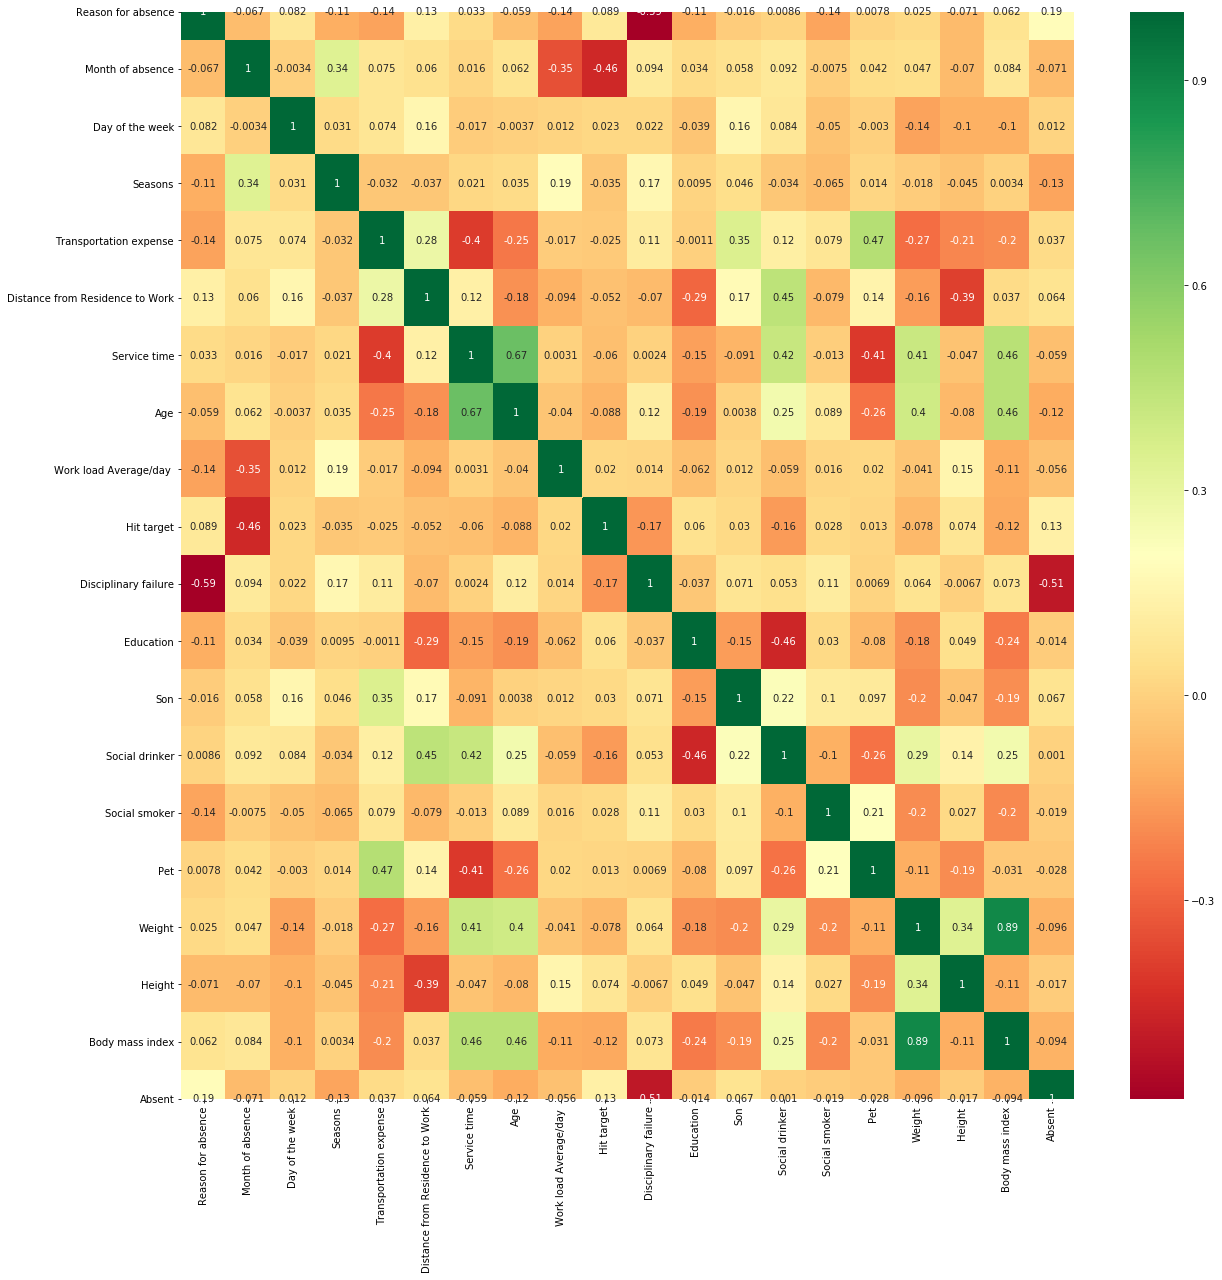

In [16]:
xTrain = train.drop(['Absent'], axis=1)
yTrain = train['Absent']

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(xTrain, yTrain)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(xTrain.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(17,'Score'))  #print 17 best features

#apply Feature Importance to extract top 10 best features
model = ExtraTreesClassifier()
model.fit(xTrain, yTrain)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=xTrain.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

#get correlations of each features in dataset
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [43]:
xTrain

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index
0,26,7,3,1,3,2,1,0,0,2,0,1,2,1,0,1,1
1,0,7,3,1,0,0,3,2,0,2,1,1,1,1,0,0,2
2,23,7,4,1,0,3,3,1,0,2,0,1,0,1,0,0,2
3,7,7,5,1,3,0,2,2,0,2,0,1,2,1,1,0,0
4,23,7,5,1,3,2,1,0,0,2,0,1,2,1,0,1,1
5,23,7,6,1,0,3,3,1,0,2,0,1,0,1,0,0,2
6,22,7,6,1,3,3,0,0,0,2,0,1,1,1,0,4,1
7,23,7,6,1,2,2,1,1,0,2,0,1,4,1,0,0,0
8,19,7,2,1,0,0,2,0,0,2,0,1,2,1,0,0,1
9,22,7,2,1,2,0,2,1,0,2,0,3,1,0,0,1,1


## Models

Subsets

In [15]:
def model_subsets():  
    xTrain = train.drop(['Absent'], axis=1)
    yTrain = train['Absent']

    xTest = test.drop(['Absent'], axis=1)
    yTest = test['Absent']

    xTrain_upsampled = train_upsampled.drop(['Absent'], axis=1)
    yTrain_upsampled = train_upsampled['Absent']

    xTrain_downsampled = train_downsampled.drop(['Absent'], axis=1)
    yTrain_downsampled = train_downsampled['Absent']

    xTrain_upsampled_downsampled = train_upsampled_downsampled.drop(['Absent'], axis=1)
    yTrain_upsampled_downsampled = train_upsampled_downsampled['Absent']

    xTrain_upsampled_upsampled = train_upsampled_upsampled.drop(['Absent'], axis=1)
    yTrain_upsampled_upsampled = train_upsampled_upsampled['Absent']

    sm = SMOTE(random_state=RANDOM_STATE, sampling_strategy = 1.0)
    xTrain_smote, yTrain_smote = sm.fit_sample(xTrain, yTrain)

##### Linear SVC

In [19]:
numFolds = 5
model = LinearSVC(random_state = RANDOM_STATE)
scores = cross_val_score(model, xTrain, yTrain, cv=numFolds, scoring='f1')
print(">>> ORIGINAL")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2 * 100))

scores = cross_val_score(model, xTrain_upsampled, yTrain_upsampled, cv=numFolds, scoring='f1')
print(">>> OVERSAMPLED")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2 * 100))

scores = cross_val_score(model, xTrain_downsampled, yTrain_downsampled, cv=numFolds, scoring='f1')
print(">>> DOWNSAMPLED")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2 * 100))

scores = cross_val_score(model, xTrain_upsampled_downsampled, yTrain_upsampled_downsampled, cv=numFolds, scoring='f1')
print(">>> UNDERSAMPLED & OVERSAMPLED")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2 * 100))

scores = cross_val_score(model, xTrain_upsampled_upsampled, yTrain_upsampled_upsampled, cv=numFolds, scoring='f1')
print(">>> OVERSAMPLED & OVERSAMPLED")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2 * 100))

C:\Users\vjcastro\AppData\Local\Continuum\anaconda3\envs\py3.6\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vjcastro\AppData\Local\Continuum\anaconda3\envs\py3.6\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vjcastro\AppData\Local\Continuum\anaconda3\envs\py3.6\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vjcastro\AppData\Local\Continuum\anaconda3\envs\py3.6\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vjcastro\AppData\Lo

>>> ORIGINAL
[0.89772727 0.89265537 0.91860465 0.92397661 0.88268156]
Accuracy: 90.31 (+/- 3.14)


C:\Users\vjcastro\AppData\Local\Continuum\anaconda3\envs\py3.6\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vjcastro\AppData\Local\Continuum\anaconda3\envs\py3.6\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vjcastro\AppData\Local\Continuum\anaconda3\envs\py3.6\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vjcastro\AppData\Local\Continuum\anaconda3\envs\py3.6\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


>>> OVERSAMPLED
[0.79       0.81564246 0.77714286 0.80225989 0.53448276]
Accuracy: 74.39 (+/- 21.10)
>>> DOWNSAMPLED
[0.70175439 0.66666667 0.09090909 0.71428571 0.66666667]
Accuracy: 56.81 (+/- 47.86)


C:\Users\vjcastro\AppData\Local\Continuum\anaconda3\envs\py3.6\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vjcastro\AppData\Local\Continuum\anaconda3\envs\py3.6\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vjcastro\AppData\Local\Continuum\anaconda3\envs\py3.6\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vjcastro\AppData\Local\Continuum\anaconda3\envs\py3.6\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vjcastro\AppData\Lo

>>> UNDERSAMPLED & OVERSAMPLED
[0.68852459 0.66666667 0.75925926 0.09090909 0.        ]
Accuracy: 44.11 (+/- 65.15)


C:\Users\vjcastro\AppData\Local\Continuum\anaconda3\envs\py3.6\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vjcastro\AppData\Local\Continuum\anaconda3\envs\py3.6\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vjcastro\AppData\Local\Continuum\anaconda3\envs\py3.6\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


>>> OVERSAMPLED & OVERSAMPLED
[0.         0.90350877 0.93636364 0.91071429 0.91071429]
Accuracy: 73.23 (+/- 73.26)


C:\Users\vjcastro\AppData\Local\Continuum\anaconda3\envs\py3.6\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\vjcastro\AppData\Local\Continuum\anaconda3\envs\py3.6\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


##### KNN

In [18]:
numFolds = 5
model = KNeighborsClassifier()
scores = cross_val_score(model, xTrain, yTrain, cv=numFolds, scoring='accuracy')
# Train model
model_roc = model.fit(xTrain, yTrain)
prob_y_1 = model_roc.predict_proba(xTrain)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(">>> ORIGINAL")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2 * 100))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain, prob_y_1)))

scores = cross_val_score(model, xTrain_upsampled, yTrain_upsampled, cv=numFolds, scoring='accuracy')
# Train model
model_roc = model.fit(xTrain_upsampled, yTrain_upsampled)
prob_y_1 = model_roc.predict_proba(xTrain_upsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(">>> OVERSAMPLED")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2 * 100))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_upsampled, prob_y_1)))

scores = cross_val_score(model, xTrain_downsampled, yTrain_downsampled, cv=numFolds, scoring='accuracy')
# Train model
model_roc = model.fit(xTrain_downsampled, yTrain_downsampled)
prob_y_1 = model_roc.predict_proba(xTrain_downsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(">>> DOWNSAMPLED")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2 * 100))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_downsampled, prob_y_1)))

scores = cross_val_score(model, xTrain_upsampled_downsampled, yTrain_upsampled_downsampled, cv=numFolds, scoring='accuracy')
# Train model
model_roc = model.fit(xTrain_upsampled_downsampled, yTrain_upsampled_downsampled)
prob_y_1 = model_roc.predict_proba(xTrain_upsampled_downsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(">>> UNDERSAMPLED & OVERSAMPLED")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2 * 100))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_upsampled_downsampled, prob_y_1)))

scores = cross_val_score(model, xTrain_upsampled_upsampled, yTrain_upsampled_upsampled, cv=numFolds, scoring='accuracy')
# Train model
model_roc = model.fit(xTrain_upsampled_upsampled, yTrain_upsampled_upsampled)
prob_y_1 = model_roc.predict_proba(xTrain_upsampled_upsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(">>> OVERSAMPLED & OVERSAMPLED")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2 * 100))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_upsampled_upsampled, prob_y_1)))

>>> ORIGINAL
[0.75 0.77 0.71 0.79 0.76]
Accuracy: 75.60 (+/- 5.31)
AUROC score: 0.86
>>> OVERSAMPLED
[0.65289256 0.60330579 0.63636364 0.72727273 0.70247934]
Accuracy: 66.45 (+/- 8.97)
AUROC score: 0.93
>>> DOWNSAMPLED
[0.54761905 0.42857143 0.42857143 0.45238095 0.47619048]
Accuracy: 46.67 (+/- 8.83)
AUROC score: 0.79
>>> UNDERSAMPLED & OVERSAMPLED
[0.69047619 0.54761905 0.66666667 0.73809524 0.75      ]
Accuracy: 67.86 (+/- 14.44)
AUROC score: 0.89
>>> OVERSAMPLED & OVERSAMPLED
[0.81538462 0.79230769 0.79230769 0.76923077 0.81395349]
Accuracy: 79.66 (+/- 3.39)
AUROC score: 0.94


##### SVM

In [17]:
numFolds = 5
model = svm.SVC(random_state = RANDOM_STATE, probability=True)
scores = cross_val_score(model, xTrain, yTrain, cv=numFolds, scoring='accuracy')
# Train model
model_roc = model.fit(xTrain, yTrain)
prob_y_1 = model_roc.predict_proba(xTrain)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(">>> ORIGINAL")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2 * 100))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain, prob_y_1)))

scores = cross_val_score(model, xTrain_upsampled, yTrain_upsampled, cv=numFolds, scoring='accuracy')
# Train model
model_roc = model.fit(xTrain_upsampled, yTrain_upsampled)
prob_y_1 = model_roc.predict_proba(xTrain_upsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(">>> OVERSAMPLED")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2 * 100))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_upsampled, prob_y_1)))

scores = cross_val_score(model, xTrain_downsampled, yTrain_downsampled, cv=numFolds, scoring='accuracy')
# Train model
model_roc = model.fit(xTrain_downsampled, yTrain_downsampled)
prob_y_1 = model_roc.predict_proba(xTrain_downsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(">>> DOWNSAMPLED")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2 * 100))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_downsampled, prob_y_1)))

scores = cross_val_score(model, xTrain_upsampled_downsampled, yTrain_upsampled_downsampled, cv=numFolds, scoring='accuracy')
# Train model
model_roc = model.fit(xTrain_upsampled_downsampled, yTrain_upsampled_downsampled)
prob_y_1 = model_roc.predict_proba(xTrain_upsampled_downsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(">>> UNDERSAMPLED & OVERSAMPLED")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2 * 100))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_upsampled_downsampled, prob_y_1)))

scores = cross_val_score(model, xTrain_upsampled_upsampled, yTrain_upsampled_upsampled, cv=numFolds, scoring='accuracy')
# Train model
model_roc = model.fit(xTrain_upsampled_upsampled, yTrain_upsampled_upsampled)
prob_y_1 = model_roc.predict_proba(xTrain_upsampled_upsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(">>> OVERSAMPLED & OVERSAMPLED")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2 * 100))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_upsampled_upsampled, prob_y_1)))

>>> ORIGINAL
[0.79 0.79 0.79 0.79 0.79]
Accuracy: 79.00 (+/- 0.00)
AUROC score: 0.75
>>> OVERSAMPLED
[0.65289256 0.65289256 0.65289256 0.65289256 0.65289256]
Accuracy: 65.29 (+/- 0.00)
AUROC score: 0.83
>>> DOWNSAMPLED
[0.45238095 0.45238095 0.66666667 0.76190476 0.5       ]
Accuracy: 56.67 (+/- 25.09)
AUROC score: 0.41
>>> UNDERSAMPLED & OVERSAMPLED
[0.48809524 0.48809524 0.51190476 0.60714286 0.53571429]
Accuracy: 52.62 (+/- 8.83)
AUROC score: 0.46
>>> OVERSAMPLED & OVERSAMPLED
[0.79230769 0.79230769 0.79230769 0.78461538 0.79069767]
Accuracy: 79.04 (+/- 0.60)
AUROC score: 0.78


##### RF

In [16]:
numFolds = 5
model = RandomForestClassifier(random_state = RANDOM_STATE)
scores = cross_val_score(model, xTrain, yTrain, cv=numFolds, scoring='accuracy')
# Train model
model_roc = model.fit(xTrain, yTrain)
prob_y_1 = model_roc.predict_proba(xTrain)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(">>> ORIGINAL")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2 * 100))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain, prob_y_1)))

scores = cross_val_score(model, xTrain_upsampled, yTrain_upsampled, cv=numFolds, scoring='accuracy')
# Train model
model_roc = model.fit(xTrain_upsampled, yTrain_upsampled)
prob_y_1 = model_roc.predict_proba(xTrain)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(">>> OVERSAMPLED")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2 * 100))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain, prob_y_1)))

scores = cross_val_score(model, xTrain_downsampled, yTrain_downsampled, cv=numFolds, scoring='accuracy')
# Train model
model_roc = model.fit(xTrain_downsampled, yTrain_downsampled)
prob_y_1 = model_roc.predict_proba(xTrain_downsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(">>> DOWNSAMPLED")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2 * 100))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_downsampled, prob_y_1)))

scores = cross_val_score(model, xTrain_upsampled_downsampled, yTrain_upsampled_downsampled, cv=numFolds, scoring='accuracy')
# Train model
model_roc = model.fit(xTrain_upsampled_downsampled, yTrain_upsampled_downsampled)
prob_y_1 = model_roc.predict_proba(xTrain)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(">>> UNDERSAMPLED & OVERSAMPLED")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2 * 100))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain, prob_y_1)))

scores = cross_val_score(model, xTrain_upsampled_upsampled, yTrain_upsampled_upsampled, cv=numFolds, scoring='accuracy')
# Train model
model_roc = model.fit(xTrain_upsampled_upsampled, yTrain_upsampled_upsampled)
prob_y_1 = model_roc.predict_proba(xTrain)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(">>> OVERSAMPLED & OVERSAMPLED")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2 * 100))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain, prob_y_1)))

>>> ORIGINAL
[0.81 0.73 0.9  0.86 0.82]
Accuracy: 82.40 (+/- 11.36)
AUROC score: 1.00
>>> OVERSAMPLED
[0.83471074 0.7768595  0.85950413 0.87603306 0.83471074]
Accuracy: 83.64 (+/- 6.73)
AUROC score: 0.99
>>> DOWNSAMPLED
[0.61904762 0.54761905 0.64285714 0.66666667 0.57142857]
Accuracy: 60.95 (+/- 8.83)
AUROC score: 1.00
>>> UNDERSAMPLED & OVERSAMPLED
[0.9047619  0.82142857 0.80952381 0.88095238 0.85714286]
Accuracy: 85.48 (+/- 7.13)
AUROC score: 0.98
>>> OVERSAMPLED & OVERSAMPLED
[0.96923077 0.93846154 0.90769231 0.91538462 0.97674419]
Accuracy: 94.15 (+/- 5.55)
AUROC score: 0.98


### Tests with AUROC and other metrics

##### Observações
* Logistic Regression, Linear SVM, SVM and RF should be the best. The problem easily overfits for complicated algorithms.

Ciclo por todos os modelos

In [94]:
from sklearn import svm


## teste dataset treino vs teste
logreg = LogisticRegression(random_state = RANDOM_STATE)
linear = LinearSVC(random_state = RANDOM_STATE)
gnb = GaussianNB()
knn = KNeighborsClassifier()
svm = svm.SVC(random_state = RANDOM_STATE, probability=True)
rf = RandomForestClassifier(random_state = RANDOM_STATE, min_samples_leaf=3)
xgboost = XGBClassifier()

models = [["logreg", logreg],
          ["linear", linear],
          ["gaussian naive bayes", gnb],
          ["knn", knn],
          ["svm", svm],
          ["rf", rf],
          ["xgboost", xgboost]
         ]


for (name, model) in models:
    print("############################## MODEL " + name + " ##############################")
    # Train model
    model_roc = model.fit(xTrain, yTrain) # modificar aqui para testar subsets
    # Evaluate model
    y_pred = model_roc.predict(xTest)
    if (name != "linear"):
        prob_y_1 = model_roc.predict_proba(xTrain)
        prob_y_1 = [p[1] for p in prob_y_1]
    # Print results
    print(">>> TRAIN/TEST -> ORIGINAL")
    print(confusion_matrix(yTest, y_pred))
    print(classification_report(yTest, y_pred))
    if (name != "linear"):
        print("AUROC score: %0.2f" % (roc_auc_score(yTrain, prob_y_1)))

    # Train model
    model_roc = model.fit(xTrain_upsampled, yTrain_upsampled) # modificar aqui para testar subsets
    # Evaluate model
    y_pred = model_roc.predict(xTest)
    if (name != "linear"):
        prob_y_1 = model_roc.predict_proba(xTrain_upsampled)
        prob_y_1 = [p[1] for p in prob_y_1]
    # Print results
    print(">>> TRAIN/TEST -> UPSAMPLED")
    print(confusion_matrix(yTest, y_pred))
    print(classification_report(yTest, y_pred))
    if (name != "linear"):
        print("AUROC score: %0.2f" % (roc_auc_score(yTrain_upsampled, prob_y_1)))

    # Train model
    model_roc = model.fit(xTrain_downsampled, yTrain_downsampled) # modificar aqui para testar subsets
    # Evaluate model
    y_pred = model_roc.predict(xTest)
    if (name != "linear"):
        prob_y_1 = model_roc.predict_proba(xTrain_downsampled)
        prob_y_1 = [p[1] for p in prob_y_1]
    # Print results
    print(">>> TRAIN/TEST -> DOWNSAMPLED")
    print(confusion_matrix(yTest, y_pred))
    print(classification_report(yTest, y_pred))
    if (name != "linear"):
        print("AUROC score: %0.2f" % (roc_auc_score(yTrain_downsampled, prob_y_1)))

    # Train model
    model_roc = model.fit(xTrain_upsampled_downsampled, yTrain_upsampled_downsampled) # modificar aqui para testar subsets
    # Evaluate model
    y_pred = model_roc.predict(xTest)
    if (name != "linear"):
        prob_y_1 = model_roc.predict_proba(xTrain_upsampled_downsampled)
        prob_y_1 = [p[1] for p in prob_y_1]
    # Print results
    print(">>> TRAIN/TEST -> UPSAMPLED & UNDERSAMPLED")
    print(confusion_matrix(yTest, y_pred))
    print(classification_report(yTest, y_pred))
    if (name != "linear"):
        print("AUROC score: %0.2f" % (roc_auc_score(yTrain_upsampled_downsampled, prob_y_1)))
    
    # Train model
    model_roc = model.fit(xTrain_upsampled_upsampled, yTrain_upsampled_upsampled) # modificar aqui para testar subsets
    # Evaluate model
    y_pred = model_roc.predict(xTest)
    if (name != "linear"):
        prob_y_1 = model_roc.predict_proba(xTrain_upsampled_upsampled)
        prob_y_1 = [p[1] for p in prob_y_1]
    # Print results
    print(">>> TRAIN/TEST -> UPSAMPLED & UPSAMPLED")
    print(confusion_matrix(yTest, y_pred))
    print(classification_report(yTest, y_pred))
    if (name != "linear"):
        print("AUROC score: %0.2f" % (roc_auc_score(yTrain_upsampled_upsampled, prob_y_1)))
        
    # Train model
    model_roc = model.fit(xTrain_smote, yTrain_smote) # modificar aqui para testar subsets
    # Evaluate model
    y_pred = model_roc.predict(xTest)
    if (name != "linear"):
        prob_y_1 = model_roc.predict_proba(xTrain_smote)
        prob_y_1 = [p[1] for p in prob_y_1]
    # Print results
    print(">>> TRAIN/TEST -> SMOTE")
    print(confusion_matrix(yTest, y_pred))
    print(classification_report(yTest, y_pred))
    if (name != "linear"):
        print("AUROC score: %0.2f" % (roc_auc_score(yTrain_smote, prob_y_1)))

############################## MODEL logreg ##############################
>>> TRAIN/TEST -> ORIGINAL
[[  8  36]
 [ 16 180]]
              precision    recall  f1-score   support

           0       0.33      0.18      0.24        44
           1       0.83      0.92      0.87       196

    accuracy                           0.78       240
   macro avg       0.58      0.55      0.55       240
weighted avg       0.74      0.78      0.76       240

AUROC score: 0.89
>>> TRAIN/TEST -> UPSAMPLED
[[ 12  32]
 [ 37 159]]
              precision    recall  f1-score   support

           0       0.24      0.27      0.26        44
           1       0.83      0.81      0.82       196

    accuracy                           0.71       240
   macro avg       0.54      0.54      0.54       240
weighted avg       0.72      0.71      0.72       240

AUROC score: 0.89
>>> TRAIN/TEST -> DOWNSAMPLED
[[ 12  32]
 [ 44 152]]
              precision    recall  f1-score   support

           0       0.21   

In [26]:
xTrain.head(2)

,Work load Average/day,Hit target,Disciplinary failure,Reason for absence__0,Reason for absence__1,Reason for absence__3,Reason for absence__4,Reason for absence__5,Reason for absence__6,Reason for absence__7,Reason for absence__8,Reason for absence__9,Reason for absence__10,Reason for absence__11,Reason for absence__12,Reason for absence__13,Reason for absence__14,Reason for absence__15,Reason for absence__17,Reason for absence__18,Reason for absence__19,Reason for absence__21,Reason for absence__22,Reason for absence__23,Reason for absence__24,Reason for absence__25,Reason for absence__26,Reason for absence__27,Reason for absence__28,Month of absence__1,Month of absence__2,Month of absence__3,Month of absence__4,Month of absence__5,Month of absence__6,Month of absence__7,Month of absence__8,Month of absence__9,Month of absence__10,Month of absence__11,Month of absence__12,Seasons__1,Seasons__2,Seasons__3,Seasons__4,Day of the week__2,Day of the week__3,Day of the week__4,Day of the week__5,Day of the week__6
0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


##### Teste a SVM com balanced weights em cada um dos SUBSETS

In [31]:
subsets = [
    ["original", [xTrain, yTrain]],
    ["upsample", [xTrain_upsampled, yTrain_upsampled]],
    ["downsample", [xTrain_downsampled, yTrain_downsampled]],
    ["upsample and downsample", [xTrain_upsampled_downsampled, yTrain_upsampled_downsampled]],
    ["upsample and upsample", [xTrain_upsampled_upsampled, yTrain_upsampled_upsampled]],
]

for (subset, (x, y)) in subsets:
    # Train model WITH BALANCING
    print("BALANCED CLASS SVM --> ", subset)
    clf_3 = svm.SVC(kernel='linear', 
                class_weight='balanced', # penalize
                probability=True,
                random_state = RANDOM_STATE)
    clf_3.fit(x, y)
    # Predict on test set
    pred_y_3 = clf_3.predict(xTest)
    # Is our model still predicting just one class?
    print( np.unique( pred_y_3 ) )
    # How's our accuracy?
    print(confusion_matrix(yTest, pred_y_3))
    print("Acc: ", accuracy_score(yTest, pred_y_3) )
    print("F1 score: ", f1_score(yTest, pred_y_3, average='binary'))
    # What about AUROC?
    prob_y_3 = clf_3.predict_proba(xTest)
    prob_y_3 = [p[1] for p in prob_y_3]
    print("AUROC: ", roc_auc_score(yTest, prob_y_3) )    

BALANCED CLASS SVM -->  original


AttributeError: 'SVC' object has no attribute 'SVC'

##### Calibration plot SVM, RF, KNN with SMOTE

1    395
0    105
Name: Absent, dtype: int64 [395 395]
[0 1]
[[ 23  21]
 [ 79 117]]
Acc:  0.5833333333333334
F1 score:  0.7005988023952097
AUROC:  0.5669642857142857
[0 1]
[[ 22  22]
 [ 68 128]]
Acc:  0.625
F1 score:  0.7398843930635838
AUROC:  0.6084183673469389
[0 1]
[[ 25  19]
 [109  87]]
Acc:  0.4666666666666667
F1 score:  0.5761589403973509
AUROC:  0.5155380333951762


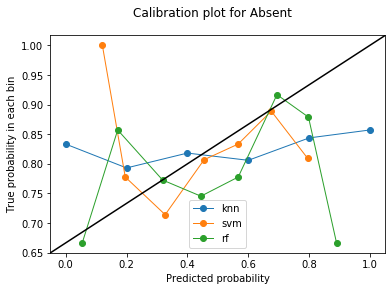

SVM 8 Bin distribution: [ 1  9 35 57 42 54 42  0  0]
RF 8 Bin distribution: [ 6  7 22 55 54 60 33  3  0]
KNN 8 Bin distribution: [ 6 29  0 99 67  0 32  7  0]


In [27]:
from sklearn import svm


## teste com upsamble com SMOTE
NBINS = 8

sm = SMOTE(random_state=RANDOM_STATE, sampling_strategy = 1.0)
xTrain_smote, yTrain_smote = sm.fit_sample(xTrain, yTrain)
print (yTrain.value_counts(), np.bincount(yTrain_smote))

xTrain_smote = xTrain_downsampled
yTrain_smote = yTrain_downsampled

# Train SVM model WITH BALANCING
clf_3 = svm.SVC(kernel='linear', 
            probability=True,
            random_state = RANDOM_STATE)
clf_3.fit(xTrain_smote, yTrain_smote)
# Predict on test set
pred_y_3 = clf_3.predict(xTest)
# Is our model still predicting just one class?
print( np.unique( pred_y_3 ) )
# How's our accuracy?
print(confusion_matrix(yTest, pred_y_3))
print("Acc: ", accuracy_score(yTest, pred_y_3) )
print("F1 score: ", f1_score(yTest, pred_y_3, average='binary'))
# What about AUROC?
prob_y_3 = clf_3.predict_proba(xTest)
prob_y_3 = [p[1] for p in prob_y_3]
print("AUROC: ", roc_auc_score(yTest, prob_y_3) ) 

# Train RF model
clf_2 = RandomForestClassifier(random_state = RANDOM_STATE)
clf_2.fit(xTrain_smote, yTrain_smote)
# Predict on test set
pred_y_2 = clf_2.predict(xTest)
# Is our model still predicting just one class?
print( np.unique( pred_y_2 ) )
# How's our accuracy?
print(confusion_matrix(yTest, pred_y_2))
print("Acc: ", accuracy_score(yTest, pred_y_2) )
print("F1 score: ", f1_score(yTest, pred_y_2, average='binary'))
# What about AUROC?
prob_y_2 = clf_2.predict_proba(xTest)
prob_y_2 = [p[1] for p in prob_y_2]
print("AUROC: ", roc_auc_score(yTest, prob_y_2) ) 

# Train KNN model
clf_1 = KNeighborsClassifier()
clf_1.fit(xTrain_smote, yTrain_smote)
# Predict on test set
pred_y_1 = clf_1.predict(xTest)
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# How's our accuracy?
print(confusion_matrix(yTest, pred_y_1))
print("Acc: ", accuracy_score(yTest, pred_y_1) )
print("F1 score: ", f1_score(yTest, pred_y_1, average='binary'))
# What about AUROC?
prob_y_1 = clf_1.predict_proba(xTest)
prob_y_1 = [p[1] for p in prob_y_1]
print("AUROC: ", roc_auc_score(yTest, prob_y_1) ) 

# Check for class calibration
svm_y, svm_x = calibration_curve(yTest, prob_y_3, n_bins=NBINS)
rf_y, rf_x = calibration_curve(yTest, prob_y_2, n_bins=NBINS)
knn_y, knn_x = calibration_curve(yTest, prob_y_1, n_bins=NBINS)
# Plot calibration graph
fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(knn_x, knn_y, marker='o', linewidth=1, label='knn')
plt.plot(svm_x, svm_y, marker='o', linewidth=1, label='svm')
plt.plot(rf_x, rf_y, marker='o', linewidth=1, label='rf')
# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for Absent')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()
# print bin distribution
print("SVM", NBINS, "Bin distribution:", bin_total(yTest, prob_y_3, n_bins=NBINS))
print("RF", NBINS, "Bin distribution:", bin_total(yTest, prob_y_2, n_bins=NBINS))
print("KNN", NBINS, "Bin distribution:", bin_total(yTest, prob_y_1, n_bins=NBINS))

In [85]:
def bin_total(y_true, y_prob, n_bins):
    bins = np.linspace(0., 1. + 1e-8, n_bins + 1)

    # In sklearn.calibration.calibration_curve,
    # the last value in the array is always 0.
    binids = np.digitize(y_prob, bins) - 1

    return np.bincount(binids, minlength=len(bins))

## Teste com ANN

In [108]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [89]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=50, activation='relu'))
    model.add(Dense(20, input_dim=30, activation='relu'))
    model.add(Dense(10, input_dim=20, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [26]:
# change according to subset
X = xTrain
Y = yTrain

estimators = []
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))









Smaller: 82.80% (6.40%)


In [92]:
EPOCHS = 100
BATCH_SIZE = 5

model = create_model()

print('####################################################################')
model.fit(xTrain, yTrain, epochs=EPOCHS, batch_size=BATCH_SIZE)
test_loss, test_acc = model.evaluate(xTest, yTest)
print('Test accuracy:', test_acc)

print('####################################################################')
model.fit(xTrain_upsampled, yTrain_upsampled, epochs=EPOCHS, batch_size=BATCH_SIZE)
test_loss, test_acc = model.evaluate(xTest, yTest)
print('Test accuracy:', test_acc)

print('####################################################################')
model.fit(xTrain_downsampled, yTrain_downsampled, epochs=EPOCHS, batch_size=BATCH_SIZE)
test_loss, test_acc = model.evaluate(xTest, yTest)
print('Test accuracy:', test_acc)

print('####################################################################')
model.fit(xTrain_upsampled_downsampled, yTrain_upsampled_downsampled, epochs=EPOCHS, batch_size=BATCH_SIZE)
test_loss, test_acc = model.evaluate(xTest, yTest)
print('Test accuracy:', test_acc)

print('####################################################################')
model.fit(xTrain_upsampled_upsampled, yTrain_upsampled_upsampled, epochs=EPOCHS, batch_size=BATCH_SIZE)
test_loss, test_acc = model.evaluate(xTest, yTest)
print('Test accuracy:', test_acc)

print('####################################################################')
model.fit(xTrain_smote, yTrain_smote, epochs=EPOCHS, batch_size=BATCH_SIZE)
test_loss, test_acc = model.evaluate(xTest, yTest)
print('Test accuracy:', test_acc)

####################################################################
Epoch 1/100
500/500 [==============================] - 3s 6ms/step - loss: 0.5533 - acc: 0.7740
Epoch 2/100
500/500 [==============================] - 0s 435us/step - loss: 0.4668 - acc: 0.7900
Epoch 3/100
500/500 [==============================] - 0s 425us/step - loss: 0.4275 - acc: 0.8160
Epoch 4/100
500/500 [==============================] - 0s 423us/step - loss: 0.3838 - acc: 0.8460
Epoch 5/100
500/500 [==============================] - 0s 425us/step - loss: 0.3533 - acc: 0.8500
Epoch 6/100
500/500 [==============================] - 0s 425us/step - loss: 0.3217 - acc: 0.8620
Epoch 7/100
500/500 [==============================] - 0s 413us/step - loss: 0.3061 - acc: 0.8640
Epoch 8/100
500/500 [==============================] - 0s 414us/step - loss: 0.2930 - acc: 0.8660
Epoch 9/100
500/500 [==============================] - 0s 414us/step - loss: 0.2795 - acc: 0.8720
Epoch 10/100
500/500 [=============================

## Tuning

In [100]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#### Find possible best parameters for Grid Search

##### Best for Log Reg

In [124]:
random_grid = {'penalty' : ['l1', 'l2'],
                'C' : [0.001, 0.01, 0.1, 1, 10, 100],
                'class_weight' : ['balanced', None],
                'solver' : ['liblinear']}
print(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
logreg = LogisticRegression()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
logreg_random = RandomizedSearchCV(estimator = logreg, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=RANDOM_STATE, n_jobs = -1)
# Fit the random search model
logreg_random.fit(xTrain, yTrain)

print("Best parameters:")
logreg_random.best_params_

{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'class_weight': ['balanced', None], 'solver': ['liblinear']}


C:\Users\vjcastro\AppData\Local\Continuum\anaconda3\envs\py3.6\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.5s


Best parameters:


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.2s finished


{'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None, 'C': 0.1}

##### Best for SVM

In [134]:
random_grid = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                'gamma' : ['auto', 'scale'],
                'C' : [0.001, 0.01, 0.1, 1, 10, 100],
                'class_weight' : ['balanced', None]}
print(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
svm = SVC()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
svm_random = RandomizedSearchCV(estimator = svm, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=RANDOM_STATE, n_jobs = -1)
# Fit the random search model
svm_random.fit(xTrain, yTrain)

print("Best parameters:")
svm_random.best_params_

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['auto', 'scale'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'class_weight': ['balanced', None]}


C:\Users\vjcastro\AppData\Local\Continuum\anaconda3\envs\py3.6\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s


Best parameters:


[Parallel(n_jobs=-1)]: Done 427 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    6.3s finished


{'kernel': 'linear', 'gamma': 'auto', 'class_weight': None, 'C': 0.1}

##### Best for RF

In [103]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=RANDOM_STATE, n_jobs = -1)
# Fit the random search model
rf_random.fit(xTrain, yTrain)

print("Best parameters:")
rf_random.best_params_

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.3min finished


Best parameters:


{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

#### Get ACCURACY with best parameters

In [111]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

#### Log Reg

In [130]:
#Best result from random search: {'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None, 'C': 0.1}
param_grid = {'penalty' : ['l1', 'l2'],
                'C' : [0.001, 0.01, 0.1, 1, 10, 100],
                'class_weight' : ['balanced', None],
                'solver' : ['liblinear']}

# Create a based model
logreg = LogisticRegression()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = logreg, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

print("######################################", "ORIGINAL", "######################################")
# Fit the grid search to the data
grid_search.fit(xTrain, yTrain)
grid_search.best_params_

# Get accuracy for test
best_grid = grid_search.best_estimator_
print("Best grid:", best_grid)

# Evaluate model
y_pred = best_grid.predict(xTest)
errors = abs(y_pred - yTest)
prob_y_1 = best_grid.predict_proba(xTrain)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain, prob_y_1)))

print("######################################", "UPSAMPLED", "######################################")
# Fit the grid search to the data
grid_search.fit(xTrain_upsampled, yTrain_upsampled)
grid_search.best_params_

# Get accuracy for test
best_grid = grid_search.best_estimator_
print("Best grid:", best_grid)

# Evaluate model
y_pred = best_grid.predict(xTest)
errors = abs(y_pred - yTest)
prob_y_1 = best_grid.predict_proba(xTrain_upsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_upsampled, prob_y_1)))

print("######################################", "DOWNSAMPLED", "######################################")
# Fit the grid search to the data
grid_search.fit(xTrain_downsampled, yTrain_downsampled)
grid_search.best_params_

# Get accuracy for test
best_grid = grid_search.best_estimator_
print("Best grid:", best_grid)

# Evaluate model
y_pred = best_grid.predict(xTest)
errors = abs(y_pred - yTest)
prob_y_1 = best_grid.predict_proba(xTrain_downsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_downsampled, prob_y_1)))

print("######################################", "UPSAMPLED DOWNSAMPLED", "######################################")
# Fit the grid search to the data
grid_search.fit(xTrain_upsampled_downsampled, yTrain_upsampled_downsampled)
grid_search.best_params_

# Get accuracy for test
best_grid = grid_search.best_estimator_
print("Best grid:", best_grid)

# Evaluate model
y_pred = best_grid.predict(xTest)
errors = abs(y_pred - yTest)
prob_y_1 = best_grid.predict_proba(xTrain_upsampled_downsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_upsampled_downsampled, prob_y_1)))

print("######################################", "UPSAMPLED UPSAMPLED", "######################################")
# Fit the grid search to the data
grid_search.fit(xTrain_upsampled_upsampled, yTrain_upsampled_upsampled)
grid_search.best_params_

# Get accuracy for test
best_grid = grid_search.best_estimator_
print("Best grid:", best_grid)

# Evaluate model
y_pred = best_grid.predict(xTest)
errors = abs(y_pred - yTest)
prob_y_1 = best_grid.predict_proba(xTrain_upsampled_upsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_upsampled_upsampled, prob_y_1)))

print("######################################", "SMOTE", "######################################")
# Fit the grid search to the data
grid_search.fit(xTrain_smote, yTrain_smote)
grid_search.best_params_

# Get accuracy for test
best_grid = grid_search.best_estimator_
print("Best grid:", best_grid)

# Evaluate model
y_pred = best_grid.predict(xTest)
errors = abs(y_pred - yTest)
prob_y_1 = best_grid.predict_proba(xTrain_smote)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_smote, prob_y_1)))

###################################### ORIGINAL ######################################
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 225 out of 240 | elapsed:    5.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    6.7s finished


Best grid: LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
[[  3  41]
 [  5 191]]
              precision    recall  f1-score   support

           0       0.38      0.07      0.12        44
           1       0.82      0.97      0.89       196

    accuracy                           0.81       240
   macro avg       0.60      0.52      0.50       240
weighted avg       0.74      0.81      0.75       240

Average Error: 0.1917 degrees.
AUROC score: 0.72
###################################### UPSAMPLED ######################################
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 225 out of 240 | elapsed:    5.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    6.3s finished


Best grid: LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
[[  3  41]
 [  5 191]]
              precision    recall  f1-score   support

           0       0.38      0.07      0.12        44
           1       0.82      0.97      0.89       196

    accuracy                           0.81       240
   macro avg       0.60      0.52      0.50       240
weighted avg       0.74      0.81      0.75       240

Average Error: 0.1917 degrees.
AUROC score: 0.77
###################################### DOWNSAMPLED ######################################
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    6.4s finished


Best grid: LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
[[ 11  33]
 [ 41 155]]
              precision    recall  f1-score   support

           0       0.21      0.25      0.23        44
           1       0.82      0.79      0.81       196

    accuracy                           0.69       240
   macro avg       0.52      0.52      0.52       240
weighted avg       0.71      0.69      0.70       240

Average Error: 0.3083 degrees.
AUROC score: 0.88
###################################### UPSAMPLED DOWNSAMPLED ######################################
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 225 out of 240 | elapsed:    5.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.8s finished


Best grid: LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
[[ 14  30]
 [ 52 144]]
              precision    recall  f1-score   support

           0       0.21      0.32      0.25        44
           1       0.83      0.73      0.78       196

    accuracy                           0.66       240
   macro avg       0.52      0.53      0.52       240
weighted avg       0.71      0.66      0.68       240

Average Error: 0.3417 degrees.
AUROC score: 0.91
###################################### UPSAMPLED UPSAMPLED ######################################
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    7.1s finished


Best grid: LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
[[  8  36]
 [ 16 180]]
              precision    recall  f1-score   support

           0       0.33      0.18      0.24        44
           1       0.83      0.92      0.87       196

    accuracy                           0.78       240
   macro avg       0.58      0.55      0.55       240
weighted avg       0.74      0.78      0.76       240

Average Error: 0.2167 degrees.
AUROC score: 0.89
###################################### SMOTE ######################################
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 225 out of 240 | elapsed:    5.3s remaining:    0.3s


Best grid: LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
[[ 11  33]
 [ 30 166]]
              precision    recall  f1-score   support

           0       0.27      0.25      0.26        44
           1       0.83      0.85      0.84       196

    accuracy                           0.74       240
   macro avg       0.55      0.55      0.55       240
weighted avg       0.73      0.74      0.73       240

Average Error: 0.2625 degrees.
AUROC score: 0.97


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.6s finished


#### SVM

In [136]:
#Best result from random search: {'kernel': 'linear', 'gamma': 'auto', 'class_weight': None, 'C': 0.1}
param_grid = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                'gamma' : ['auto', 'scale'],
                'C' : [0.001, 0.01, 0.1, 1, 10, 100],
                'class_weight' : ['balanced', None]}

# Create a based model
svm = SVC(probability=True)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = svm, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

print("######################################", "ORIGINAL", "######################################")
# Fit the grid search to the data
grid_search.fit(xTrain, yTrain)
grid_search.best_params_

# Get accuracy for test
best_grid = grid_search.best_estimator_
print("Best grid:", best_grid)

# Evaluate model
y_pred = best_grid.predict(xTest)
errors = abs(y_pred - yTest)
prob_y_1 = best_grid.predict_proba(xTrain)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain, prob_y_1)))

print("######################################", "UPSAMPLED", "######################################")
# Fit the grid search to the data
grid_search.fit(xTrain_upsampled, yTrain_upsampled)
grid_search.best_params_

# Get accuracy for test
best_grid = grid_search.best_estimator_
print("Best grid:", best_grid)

# Evaluate model
y_pred = best_grid.predict(xTest)
errors = abs(y_pred - yTest)
prob_y_1 = best_grid.predict_proba(xTrain_upsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_upsampled, prob_y_1)))

print("######################################", "DOWNSAMPLED", "######################################")
# Fit the grid search to the data
grid_search.fit(xTrain_downsampled, yTrain_downsampled)
grid_search.best_params_

# Get accuracy for test
best_grid = grid_search.best_estimator_
print("Best grid:", best_grid)

# Evaluate model
y_pred = best_grid.predict(xTest)
errors = abs(y_pred - yTest)
prob_y_1 = best_grid.predict_proba(xTrain_downsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_downsampled, prob_y_1)))

print("######################################", "UPSAMPLED DOWNSAMPLED", "######################################")
# Fit the grid search to the data
grid_search.fit(xTrain_upsampled_downsampled, yTrain_upsampled_downsampled)
grid_search.best_params_

# Get accuracy for test
best_grid = grid_search.best_estimator_
print("Best grid:", best_grid)

# Evaluate model
y_pred = best_grid.predict(xTest)
errors = abs(y_pred - yTest)
prob_y_1 = best_grid.predict_proba(xTrain_upsampled_downsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_upsampled_downsampled, prob_y_1)))

print("######################################", "UPSAMPLED UPSAMPLED", "######################################")
# Fit the grid search to the data
grid_search.fit(xTrain_upsampled_upsampled, yTrain_upsampled_upsampled)
grid_search.best_params_

# Get accuracy for test
best_grid = grid_search.best_estimator_
print("Best grid:", best_grid)

# Evaluate model
y_pred = best_grid.predict(xTest)
errors = abs(y_pred - yTest)
prob_y_1 = best_grid.predict_proba(xTrain_upsampled_upsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_upsampled_upsampled, prob_y_1)))

print("######################################", "SMOTE", "######################################")
# Fit the grid search to the data
grid_search.fit(xTrain_smote, yTrain_smote)
grid_search.best_params_

# Get accuracy for test
best_grid = grid_search.best_estimator_
print("Best grid:", best_grid)

# Evaluate model
y_pred = best_grid.predict(xTest)
errors = abs(y_pred - yTest)
prob_y_1 = best_grid.predict_proba(xTrain_smote)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_smote, prob_y_1)))

###################################### ORIGINAL ######################################
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    9.5s finished


Best grid: SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
[[  4  40]
 [  7 189]]
              precision    recall  f1-score   support

           0       0.36      0.09      0.15        44
           1       0.83      0.96      0.89       196

    accuracy                           0.80       240
   macro avg       0.59      0.53      0.52       240
weighted avg       0.74      0.80      0.75       240

Average Error: 0.1958 degrees.
AUROC score: 0.81
###################################### UPSAMPLED ######################################
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 465 out of 480 | elapsed:   12.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   12.7s finished


Best grid: SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
[[  4  40]
 [  6 190]]
              precision    recall  f1-score   support

           0       0.40      0.09      0.15        44
           1       0.83      0.97      0.89       196

    accuracy                           0.81       240
   macro avg       0.61      0.53      0.52       240
weighted avg       0.75      0.81      0.76       240

Average Error: 0.1917 degrees.
AUROC score: 0.82
###################################### DOWNSAMPLED ######################################
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    6.8s finished


Best grid: SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
[[ 16  28]
 [ 51 145]]
              precision    recall  f1-score   support

           0       0.24      0.36      0.29        44
           1       0.84      0.74      0.79       196

    accuracy                           0.67       240
   macro avg       0.54      0.55      0.54       240
weighted avg       0.73      0.67      0.69       240

Average Error: 0.3292 degrees.
AUROC score: 0.87
###################################### UPSAMPLED DOWNSAMPLED ######################################
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   10.1s finished


Best grid: SVC(C=100, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
[[  8  36]
 [ 34 162]]
              precision    recall  f1-score   support

           0       0.19      0.18      0.19        44
           1       0.82      0.83      0.82       196

    accuracy                           0.71       240
   macro avg       0.50      0.50      0.50       240
weighted avg       0.70      0.71      0.71       240

Average Error: 0.2917 degrees.
AUROC score: 0.97
###################################### UPSAMPLED UPSAMPLED ######################################
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 465 out of 480 | elapsed:   12.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   12.6s finished


Best grid: SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
[[  6  38]
 [ 22 174]]
              precision    recall  f1-score   support

           0       0.21      0.14      0.17        44
           1       0.82      0.89      0.85       196

    accuracy                           0.75       240
   macro avg       0.52      0.51      0.51       240
weighted avg       0.71      0.75      0.73       240

Average Error: 0.2500 degrees.
AUROC score: 0.96
###################################### SMOTE ######################################
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   14.9s


Best grid: SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
[[  4  40]
 [ 11 185]]
              precision    recall  f1-score   support

           0       0.27      0.09      0.14        44
           1       0.82      0.94      0.88       196

    accuracy                           0.79       240
   macro avg       0.54      0.52      0.51       240
weighted avg       0.72      0.79      0.74       240

Average Error: 0.2125 degrees.
AUROC score: 0.96


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   18.5s finished


#### RF

In [131]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [3, 5, 20, 30],
    'max_features': ['auto'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3, 5, 7, 9],
    'n_estimators': [100, 500, 1400, 2000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

print("######################################", "ORIGINAL", "######################################")
# Fit the grid search to the data
grid_search.fit(xTrain, yTrain)
grid_search.best_params_

# Get accuracy for test
best_grid = grid_search.best_estimator_
print("Best grid:", best_grid)

# Evaluate model
y_pred = best_grid.predict(xTest)
errors = abs(y_pred - yTest)
prob_y_1 = best_grid.predict_proba(xTrain)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain, prob_y_1)))

print("######################################", "UPSAMPLED", "######################################")
# Fit the grid search to the data
grid_search.fit(xTrain_upsampled, yTrain_upsampled)
grid_search.best_params_

# Get accuracy for test
best_grid = grid_search.best_estimator_
print("Best grid:", best_grid)

# Evaluate model
y_pred = best_grid.predict(xTest)
errors = abs(y_pred - yTest)
prob_y_1 = best_grid.predict_proba(xTrain_upsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_upsampled, prob_y_1)))

print("######################################", "DOWNSAMPLED", "######################################")
# Fit the grid search to the data
grid_search.fit(xTrain_downsampled, yTrain_downsampled)
grid_search.best_params_

# Get accuracy for test
best_grid = grid_search.best_estimator_
print("Best grid:", best_grid)

# Evaluate model
y_pred = best_grid.predict(xTest)
errors = abs(y_pred - yTest)
prob_y_1 = best_grid.predict_proba(xTrain_downsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_downsampled, prob_y_1)))

print("######################################", "UPSAMPLED DOWNSAMPLED", "######################################")
# Fit the grid search to the data
grid_search.fit(xTrain_upsampled_downsampled, yTrain_upsampled_downsampled)
grid_search.best_params_

# Get accuracy for test
best_grid = grid_search.best_estimator_
print("Best grid:", best_grid)

# Evaluate model
y_pred = best_grid.predict(xTest)
errors = abs(y_pred - yTest)
prob_y_1 = best_grid.predict_proba(xTrain_upsampled_downsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_upsampled_downsampled, prob_y_1)))

print("######################################", "UPSAMPLED UPSAMPLED", "######################################")
# Fit the grid search to the data
grid_search.fit(xTrain_upsampled_upsampled, yTrain_upsampled_upsampled)
grid_search.best_params_

# Get accuracy for test
best_grid = grid_search.best_estimator_
print("Best grid:", best_grid)

# Evaluate model
y_pred = best_grid.predict(xTest)
errors = abs(y_pred - yTest)
prob_y_1 = best_grid.predict_proba(xTrain_upsampled_upsampled)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_upsampled_upsampled, prob_y_1)))

print("######################################", "SMOTE", "######################################")
# Fit the grid search to the data
grid_search.fit(xTrain_smote, yTrain_smote)
grid_search.best_params_

# Get accuracy for test
best_grid = grid_search.best_estimator_
print("Best grid:", best_grid)

# Evaluate model
y_pred = best_grid.predict(xTest)
errors = abs(y_pred - yTest)
prob_y_1 = best_grid.predict_proba(xTrain_smote)
prob_y_1 = [p[1] for p in prob_y_1]
# Print results
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print("AUROC score: %0.2f" % (roc_auc_score(yTrain_smote, prob_y_1)))

###################################### ORIGINAL ######################################
Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  3.0min finished


Best grid: RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[  3  41]
 [  5 191]]
              precision    recall  f1-score   support

           0       0.38      0.07      0.12        44
           1       0.82      0.97      0.89       196

    accuracy                           0.81       240
   macro avg       0.60      0.52      0.50       240
weighted avg       0.74      0.81      0.75       240

Average Error: 0.1917 degrees.
AUROC score: 0.87
###################################### UPSAMP

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  3.1min finished


Best grid: RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[  4  40]
 [  7 189]]
              precision    recall  f1-score   support

           0       0.36      0.09      0.15        44
           1       0.83      0.96      0.89       196

    accuracy                           0.80       240
   macro avg       0.59      0.53      0.52       240
weighted avg       0.74      0.80      0.75       240

Average Error: 0.1958 degrees.
AUROC score: 0.88
###################################### DOWNSA

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  2.9min finished


Best grid: RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[ 11  33]
 [ 36 160]]
              precision    recall  f1-score   support

           0       0.23      0.25      0.24        44
           1       0.83      0.82      0.82       196

    accuracy                           0.71       240
   macro avg       0.53      0.53      0.53       240
weighted avg       0.72      0.71      0.72       240

Average Error: 0.2875 degrees.
AUROC score: 0.90
###################################### UPSAMP

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  2.9min finished


Best grid: RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[  8  36]
 [ 33 163]]
              precision    recall  f1-score   support

           0       0.20      0.18      0.19        44
           1       0.82      0.83      0.83       196

    accuracy                           0.71       240
   macro avg       0.51      0.51      0.51       240
weighted avg       0.70      0.71      0.71       240

Average Error: 0.2875 degrees.
AUROC score: 0.98
###################################### UPSAM

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  3.0min finished


Best grid: RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[  4  40]
 [  7 189]]
              precision    recall  f1-score   support

           0       0.36      0.09      0.15        44
           1       0.83      0.96      0.89       196

    accuracy                           0.80       240
   macro avg       0.59      0.53      0.52       240
weighted avg       0.74      0.80      0.75       240

Average Error: 0.1958 degrees.
AUROC score: 0.98
###################################### SMOTE

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  3.0min finished


Best grid: RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[  8  36]
 [ 37 159]]
              precision    recall  f1-score   support

           0       0.18      0.18      0.18        44
           1       0.82      0.81      0.81       196

    accuracy                           0.70       240
   macro avg       0.50      0.50      0.50       240
weighted avg       0.70      0.70      0.70       240

Average Error: 0.3042 degrees.
AUROC score: 0.98


In [2]:
train

NameError: name 'train' is not defined